# Como pegar dados do Banco Central com Python

https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries

https://wilsonfreitas.github.io/python-bcb/sgs.html

In [2]:
import mplcyberpunk
from bcb import currency
from bcb import sgs
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from datetime import datetime
from datetime import timedelta

plt.style.use("cyberpunk")

# Taxa de juros

In [3]:
#série selic

selic = sgs.get({'selic':432}, start = '2010-01-01')

selic

,selic
Date,
2010-01-01,8.75
2010-01-02,8.75
2010-01-03,8.75
2010-01-04,8.75
2010-01-05,8.75
...,...
2023-03-10,13.75
2023-03-11,13.75
2023-03-12,13.75


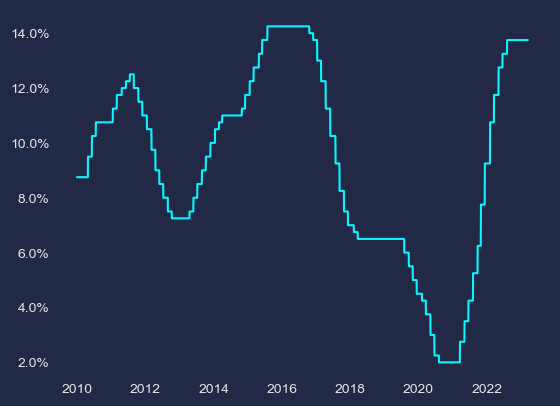

In [4]:
fig, ax = plt.subplots()

plt.style.use("cyberpunk")

ax.plot(selic.index, selic['selic'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.grid(False)
plt.savefig('selic.png', dpi = 300)

plt.show()

# Inflação

In [5]:
hoje = datetime.now()
um_ano_atras = hoje - timedelta(days = 366)

In [6]:
# Série do IPCA e IGP-M
inflacao = sgs.get({'ipca': 433,
             'igp-m': 189}, start = um_ano_atras + timedelta(180))

inflacao

,ipca,igp-m
Date,,
2022-09-01,-0.29,-0.95
2022-10-01,0.59,-0.97
2022-11-01,0.41,-0.56
2022-12-01,0.62,0.45
2023-01-01,0.53,0.21
2023-02-01,0.84,-0.06


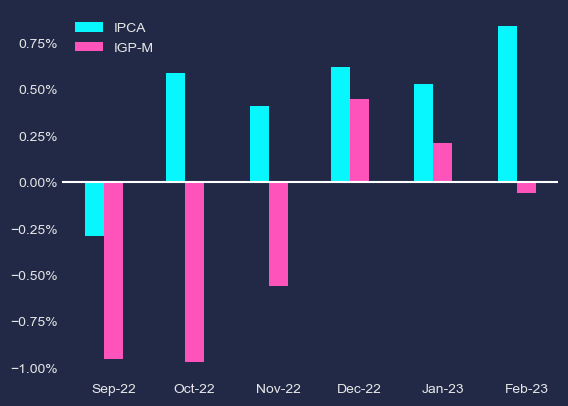

In [7]:
datas_numericas = date2num(inflacao.index)


fig, ax = plt.subplots()

ax.bar(datas_numericas-7, inflacao['ipca'], label = "IPCA", width=7)
ax.bar(datas_numericas, inflacao['igp-m'], label = "IGP-M", width=7)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis_date()
formato_data = mdates.DateFormatter('%b-%y')
ax.xaxis.set_major_formatter(formato_data)
ax.grid(False)
plt.axhline(y=0, color = 'w')
plt.legend()
plt.savefig('inflacao.png', dpi = 300)

plt.show()

# Câmbio

In [8]:
df = currency.get(['USD', 'EUR'],
                  start='2000-01-01',
                  end='2023-03-10',
                  side='ask')


df.head()

,EUR,USD
Date,,
2000-01-03,1.85047,1.8011
2000-01-04,1.89150,1.8337
2000-01-05,1.91582,1.8544
2000-01-06,1.90761,1.8461
2000-01-07,1.88241,1.8281


In [9]:
df

,EUR,USD
Date,,
2000-01-03,1.85047,1.8011
2000-01-04,1.89150,1.8337
2000-01-05,1.91582,1.8544
2000-01-06,1.90761,1.8461
2000-01-07,1.88241,1.8281
...,...,...
2023-03-06,5.55090,5.1970
2023-03-07,5.49480,5.1901
2023-03-08,5.42440,5.1387


<AxesSubplot:xlabel='Date'>

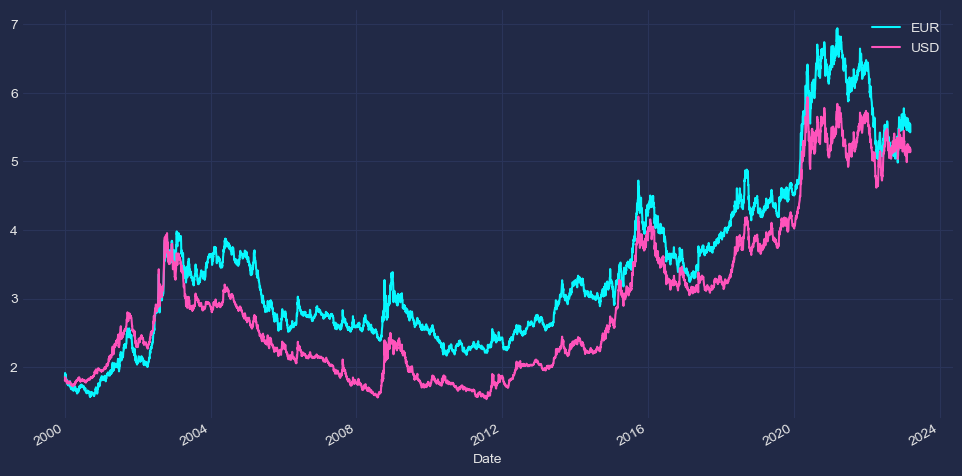

In [10]:
df.plot(figsize=(12, 6))